<a href="https://colab.research.google.com/github/Heimish-cozy/IORS/blob/main/TEST_A_%EA%B0%84%EB%8B%A8%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A1%9C_KNN%EB%B6%84%EB%A5%98_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [7]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import os.path
import rasterio
from rasterio.plot import show

데이터 불러오기

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import gdown

In [11]:
fname_img1 = "cropped_B.jpg"
fname_img2 = "cropped_R.jpg"
fname_img3 = "cropped_W.jpg"
fname_imgA = "original.jpg"

In [12]:
!gdown --id 11l4mDD4YpV74WF2R5_R4CwL-C4nTtJww
!gdown --id 1-CqCk_e-Y4UV2K8yiV1KZQFLV1S5GrRW
!gdown --id 1--ddg1FON88852Kug0wWPevbz_VcAy6k
!gdown --id 1-89acRlzLyXJ_1jzdOzLz0KE71MyPIq-

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11l4mDD4YpV74WF2R5_R4CwL-C4nTtJww
To: /content/cropped_B.jpg
100% 710/710 [00:00<00:00, 498kB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-CqCk_e-Y4UV2K8yiV1KZQFLV1S5GrRW
To: /content/cropped_R.jpg
100% 777/777 [00:00<00:00, 1.20MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1--d

* 경로체크

In [13]:
os.path.isfile(fname_img1)
os.path.isfile(fname_img2) 
os.path.isfile(fname_img3) 
os.path.isfile(fname_imgA)

True

In [14]:
img_b = rasterio.open(fname_img1)
img_r = rasterio.open(fname_img2)
img_w = rasterio.open(fname_img3)
img_A = rasterio.open(fname_imgA)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


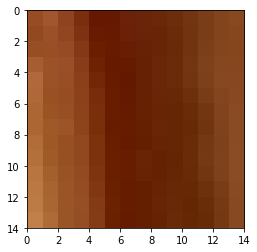

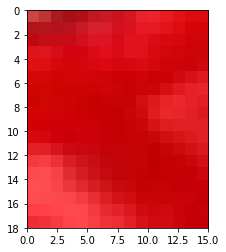

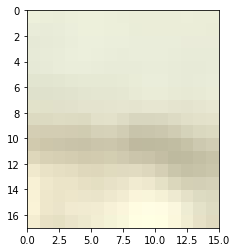

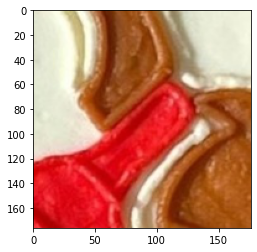

In [15]:
show(img_b)
show(img_r)
show(img_w)
show(img_A)

3차원데이터 VECTOR형태 변환

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [17]:
imframe = Image.open('cropped_B.jpg')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
b_rgb_df = pd.DataFrame(npframe)
b_rgb_df.columns = ['red','green','blue']

In [18]:
imframe = Image.open('cropped_R.jpg')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
r_rgb_df = pd.DataFrame(npframe)
r_rgb_df.columns = ['red','green','blue']

In [19]:
imframe = Image.open('cropped_W.jpg')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
w_rgb_df = pd.DataFrame(npframe)
w_rgb_df.columns = ['red','green','blue']

In [20]:
b_rgb_df

,red,green,blue
0,151,76,36
1,161,86,47
2,143,67,31
3,122,46,14
4,102,25,0
...,...,...,...
191,105,42,9
192,100,40,4
193,103,43,6
194,116,56,19


In [21]:
r_rgb_df

,red,green,blue
0,206,68,68
1,191,51,52
2,172,25,31
3,168,14,22
4,177,16,24
...,...,...,...
265,209,10,17
266,209,10,17
267,203,4,11
268,196,0,6


In [22]:
w_rgb_df

,red,green,blue
0,237,240,219
1,235,238,217
2,234,237,216
3,236,239,218
4,237,240,219
...,...,...,...
250,255,254,226
251,251,247,220
252,241,237,210
253,231,225,199


해당 그룹 index 만들기

In [23]:
#index : brown=1, red=2, white=3
train_index = [1]*196 + [2]*270 + [3]*255
train_index

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


GROUP 1,2,3 붙여서 train set/test set 나누기

In [24]:
aa = pd.concat([b_rgb_df,r_rgb_df,w_rgb_df],ignore_index=True)

In [25]:
input_arr = np.array(aa)
target_arr = np.array(train_index)

* random index 사용

In [26]:
index=np.arange(721)
np.random.shuffle(index)
print(index)

[245 114 292 676 569 694 224 645 381 480 689 131 111 220 688 194 360 180
 142 130 496 619 419 156  28 649 429 433 624 129  54 571 588 125   0 521
  31  17 681 315 465 675 695 309 258  89 123 207 300 524  12 168 144 183
 591 556 650 682 284 249 417 709 366 193 163 538 488 228  73 428 109  23
 370 700 450 540  95 614 582 593 363 432 367  24 345 204  56 437 632  51
 660   1 135 443 132 321 570 475 446 335 617  19 282 307 608 235 418 620
 330 152 400 172 272 473 714 564 364  97 278 301 291 461 237 628   8 543
 640  25 336 479  57 587 416 486  39 421 303 112 517 177 253 122  26 470
 491 202 509 240 631 613 297 188 226 711 251  27 126 458 206 311 603  50
 341 559 712 469 715 158 657  62 646 302  61 574 218 621 150 515 153 154
  58 407  35 211 390 520 528 294 339 519  37 410 420 213 385 209 408 635
 438 375 305 329  40 337 192 325 229  49 356 389 232 170 298 373 328 391
 553 236 710 501 244  29 362 599 138 175 248 128 466  96 494 568 221  33
 256  88  79 223 308 184 310 485 402 550 590 537 57

* train set/test set 분류

In [27]:
test_input = input_arr[index[541:]]
test_target = target_arr[index[541:]]
train_input = input_arr[index[:541]]
train_target = target_arr[index[:541]]

* 그룹마다 제대로 분류됐는지 확인

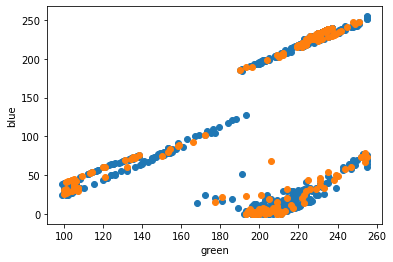

In [28]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('green')
plt.ylabel('blue')
plt.show()

* index 따라오는지 확인

In [29]:
train_input[24]

array([151,  78,  35])

In [30]:
train_target[24]

1

* 2D로 확인되지 않는 그룹 RGB 분포 확인

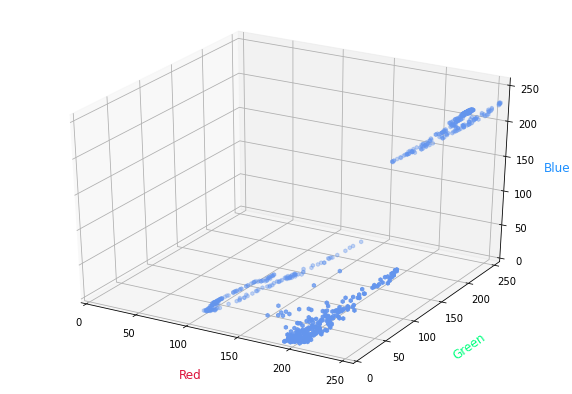

In [31]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = np.array(input_arr[:,0])
y = np.array(input_arr[:,1])
z = np.array(input_arr[:,2])

font1 = {'family': 'sans-serif',
         'color': 'crimson',
         'weight': 'normal',
         'size': 'large'
         }

font2 = {'family': 'cursive',
         'color': 'springgreen',
         'weight': 'normal',
         'size': 'large'
         }

font3 = {'family': 'cursive',
         'color': 'dodgerblue',
         'weight': 'normal',
         'size': 'large'
         }

plt.xlim([0, 255]) 
plt.ylim([0, 255])
ax.set_zlim([0, 255])

plt.xlabel('Red', labelpad=15, fontdict=font1)
plt.ylabel('Green', labelpad=15, fontdict=font2)
ax.set_zlabel('Blue', labelpad=10, fontdict=font3)

ax.scatter(x,y,z, marker='h', color='cornflowerblue', s=15)

전체 이미지 KNN분류하기

In [32]:
imframe = Image.open('original.jpg')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
A_rgb_df = pd.DataFrame(npframe)
A_rgb_df.columns = ['red','green','blue']

In [33]:
A_rgb_df

,red,green,blue
0,228,230,208
1,229,228,207
2,231,230,209
3,234,233,212
4,235,234,213
...,...,...,...
30971,163,82,19
30972,167,86,23
30973,169,88,25
30974,170,89,26


In [34]:
A_arr = np.array(A_rgb_df)

* 유클리디안 거리공식 사용

In [35]:
from scipy.spatial import distance

In [36]:
DIS = distance.cdist(A_arr, train_input, 'euclidean')

In [37]:
DIS

array([[297.79523166, 242.29114718, 302.58056778, ..., 215.8541174 ,
          8.60232527, 311.37919006],
       [295.68564389, 240.65951051, 300.50790339, ..., 213.60477523,
         10.19803903, 309.84350889],
       [298.62685747, 243.97745798, 303.48805578, ..., 216.26603987,
          7.21110255, 313.23314001],
       ...,
       [ 95.23654761,  21.65640783,  92.24424101, ...,  92.10320298,
        247.50757564,  87.28688332],
       [ 95.79665965,  22.49444376,  92.96235797, ...,  91.03845341,
        245.90038634,  88.9269363 ],
       [ 97.        ,  24.45403852,  94.47751055, ...,  88.97190568,
        242.69116177,  92.21713507]])

* Train set과 원본 이미지 matrix 확인

In [38]:
DIS.shape

(30976, 541)

* argsort 이용해서 거리순 나열

In [39]:
A_sort = np.argsort(DIS, axis=1)

In [40]:
A_sort 

array([[427, 348, 125, ..., 292, 474, 169],
       [385,  78, 332, ..., 292, 474, 169],
       [256, 303, 453, ..., 292, 474, 169],
       ...,
       [252, 382,  23, ..., 114,  73, 166],
       [252, 382,  23, ..., 114,  73, 166],
       [252, 508, 382, ..., 280,  73, 166]])

* 거리 matrix, index matrix를 적용해서 group matrix 만들기

In [41]:
ind_nearest= A_sort[:, 3]

In [42]:
re_group = train_target[ind_nearest]

In [43]:
RE = np.reshape(re_group, (176,176)) 

In [44]:
RE

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

In [45]:
A_rgb_df['Group'] = re_group
A_rgb_df

,red,green,blue,Group
0,228,230,208,3
1,229,228,207,3
2,231,230,209,3
3,234,233,212,3
4,235,234,213,3
...,...,...,...,...
30971,163,82,19,1
30972,167,86,23,1
30973,169,88,25,1
30974,170,89,26,1


In [46]:
A_np = np.array(A_rgb_df)

In [47]:
A = A_rgb_df.drop('Group',1)

<ipython-input-47-8175e9ff4872>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  A = A_rgb_df.drop('Group',1)


In [48]:
A_np

array([[228, 230, 208,   3],
       [229, 228, 207,   3],
       [231, 230, 209,   3],
       ...,
       [169,  88,  25,   1],
       [170,  89,  26,   1],
       [172,  91,  28,   1]])